In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1] range
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally (20% of width)
    height_shift_range=0.2,  # Randomly shift images vertically (20% of height)
    zoom_range=0.2,  # Random zoom by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2  # Reserve 20% of data for validation
)

# Define dataset path
data_dir = r"C:\Users\Raji\OneDrive\Desktop\Extracted_Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data"

# Load training data with augmentation
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    subset='training'
)

# Load validation data without augmentation
val_generator = datagen.flow_from_directory(
    data_dir + "/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN Model (from scratch)
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with class count
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train CNN model
cnn_history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=5)
cnn_model.save('cnn_fish_model.h5')


# Pre-trained Model 1: ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = model_resnet.fit(train_generator, validation_data=val_generator, epochs=5)

# Fine-tune ResNet50
base_model.trainable = True
history_resnet_fine = model_resnet.fit(train_generator, validation_data=val_generator, epochs=5)
model_resnet.save('resnet_fish_model.h5')


# Pre-trained Model 2: MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model_mobilenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_mobilenet = model_mobilenet.fit(train_generator, validation_data=val_generator, epochs=5)

# Fine-tune MobileNet
base_model.trainable = True
history_mobilenet_fine = model_mobilenet.fit(train_generator, validation_data=val_generator, epochs=5)
model_mobilenet.save('mobilenet_fish_model.h5')


# Pre-trained Model 3: InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model_inception = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_inception = model_inception.fit(train_generator, validation_data=val_generator, epochs=5)

# Fine-tune InceptionV3
base_model.trainable = True
history_inception_fine = model_inception.fit(train_generator, validation_data=val_generator, epochs=5)
model_inception.save('inceptionv3_fish_model.h5')


# Pre-trained Model 4: EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model_efficientnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model_efficientnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_efficientnet = model_efficientnet.fit(train_generator, validation_data=val_generator, epochs=5)

# Fine-tune EfficientNetB0
base_model.trainable = True
history_efficientnet_fine = model_efficientnet.fit(train_generator, validation_data=val_generator, epochs=5)
model_efficientnet.save('efficientnet_fish_model.h5')


# Load test dataset for evaluation
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir + "/test",  # Load images from 'test' folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate models on test dataset
print("CNN Model Test Accuracy:", cnn_model.evaluate(test_generator))
print("ResNet50 Model Test Accuracy:", model_resnet.evaluate(test_generator))
print("MobileNet Model Test Accuracy:", model_mobilenet.evaluate(test_generator))
print("InceptionV3 Model Test Accuracy:", model_inception.evaluate(test_generator))
print("EfficientNetB0 Model Test Accuracy:", model_efficientnet.evaluate(test_generator))


Found 4984 images belonging to 11 classes.
Found 215 images belonging to 11 classes.


c:\Users\Raji\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Raji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 146s 923ms/step - accuracy: 0.2119 - loss: 2.4968 - val_accuracy: 0.3302 - val_loss: 1.7523
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.3781 - loss: 1.6994 - val_accuracy: 0.4140 - val_loss: 1.4584
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.4610 - loss: 1.4501 - val_accuracy: 0.5814 - val_loss: 1.1709
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.5592 - loss: 1.2402 - val_accuracy: 0.6651 - val_loss: 0.9435
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6283 - loss: 1.0099 - val_accuracy: 0.7395 - val_loss: 0.7590


Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.1398 - loss: 2.4463 - val_accuracy: 0.1721 - val_loss: 2.2644
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.1733 - loss: 2.2685 - val_accuracy: 0.1674 - val_loss: 2.2195
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.1837 - loss: 2.2274 - val_accuracy: 0.1814 - val_loss: 2.1794
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.1938 - loss: 2.1903 - val_accuracy: 0.2140 - val_loss: 2.1583
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.2056 - loss: 2.1754 - val_accuracy: 0.2558 - val_loss: 2.1099
Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.2039 - loss: 2.1243 - val_accuracy: 0.2698 - val_loss: 2.1076
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.2236 - loss: 2.1265 - val_accuracy: 0.2372 - val_loss: 2.0802
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.2138 - loss: 2.1122 - val_accuracy: 0.

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 108s 672ms/step - accuracy: 0.5941 - loss: 1.3240 - val_accuracy: 0.9442 - val_loss: 0.1844
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 109s 697ms/step - accuracy: 0.9212 - loss: 0.2488 - val_accuracy: 0.9674 - val_loss: 0.1077
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 93s 597ms/step - accuracy: 0.9467 - loss: 0.1648 - val_accuracy: 0.9721 - val_loss: 0.0714
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 93s 598ms/step - accuracy: 0.9663 - loss: 0.1088 - val_accuracy: 0.9860 - val_loss: 0.0512
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 94s 602ms/step - accuracy: 0.9668 - loss: 0.0989 - val_accuracy: 0.9907 - val_loss: 0.0482
Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 110s 703ms/step - accuracy: 0.9720 - loss: 0.0912 - val_accuracy: 0.9953 - val_loss: 0.0308
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 93s 594ms/step - accuracy: 0.9730 - loss: 0.0821 - val_accuracy: 0.9907 - val_loss: 0.0339
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 94s 602ms/step - accuracy: 0.9715 - loss: 0.0846

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.5210 - loss: 1.4883 - val_accuracy: 0.9023 - val_loss: 0.3877
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8229 - loss: 0.5192 - val_accuracy: 0.9256 - val_loss: 0.2670
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8638 - loss: 0.4180 - val_accuracy: 0.8837 - val_loss: 0.3065
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8769 - loss: 0.3667 - val_accuracy: 0.9349 - val_loss: 0.2080
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.8931 - loss: 0.3117 - val_accuracy: 0.9442 - val_loss: 0.1944
Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.9063 - loss: 0.2724 - val_accuracy: 0.9395 - val_loss: 0.1621
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9112 - loss: 0.2509 - val_accuracy: 0.9442 - val_loss: 0.1513
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9096 - loss: 0.2453 - val_accuracy: 0.

Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 133s 780ms/step - accuracy: 0.1410 - loss: 2.3759 - val_accuracy: 0.1721 - val_loss: 2.3143
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 123s 791ms/step - accuracy: 0.1615 - loss: 2.3253 - val_accuracy: 0.1721 - val_loss: 2.3086
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 124s 793ms/step - accuracy: 0.1763 - loss: 2.3248 - val_accuracy: 0.1721 - val_loss: 2.3102
Epoch 4/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 123s 787ms/step - accuracy: 0.1744 - loss: 2.3057 - val_accuracy: 0.1721 - val_loss: 2.3133
Epoch 5/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 123s 790ms/step - accuracy: 0.1707 - loss: 2.3086 - val_accuracy: 0.1721 - val_loss: 2.3108
Epoch 1/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 123s 790ms/step - accuracy: 0.1808 - loss: 2.2996 - val_accuracy: 0.1721 - val_loss: 2.3130
Epoch 2/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 123s 790ms/step - accuracy: 0.1809 - loss: 2.3034 - val_accuracy: 0.1721 - val_loss: 2.3113
Epoch 3/5
156/156 ━━━━━━━━━━━━━━━━━━━━ 124s 792ms/step - accuracy: 0.1695 - loss: 2

Found 3187 images belonging to 11 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.8459 - loss: 0.4737
CNN Model Test Accuracy: [0.670106828212738, 0.7709444761276245]
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.3759 - loss: 1.7584
ResNet50 Model Test Accuracy: [1.9969613552093506, 0.2776906192302704]
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 414ms/step - accuracy: 0.9974 - loss: 0.0116
MobileNet Model Test Accuracy: [0.011293118819594383, 0.9974898099899292]
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 937ms/step - accuracy: 0.9824 - loss: 0.0648
InceptionV3 Model Test Accuracy: [0.07201295346021652, 0.9811735153198242]
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 714ms/step - accuracy: 0.4507 - loss: 2.1338
EfficientNetB0 Model Test Accuracy: [2.3014235496520996, 0.16316284239292145]


In [7]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import streamlit as st
import os

Evaluating Models on Test Data...
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.8459 - loss: 0.4737
CNN Model Test Accuracy: 0.7709
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step
Classification Report for CNN Model:
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.97      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.76      0.98      0.86       298
   fish sea_food gilt_head_bream       0.63      0.36      0.46       305
   fish sea_food hourse_mackerel       0.75      0.84      0.79       286
        fish sea_food red_mullet       0.91      0.95      0.93       291
     fish sea_food red_sea_bream       0.57      0.82      0.68       273
          fish sea_food sea_bass       0.65      0.39      0.49       327
            fish sea_food shrimp       0.76      0.91      0.83       289
fish sea_food striped_red_mullet  

c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


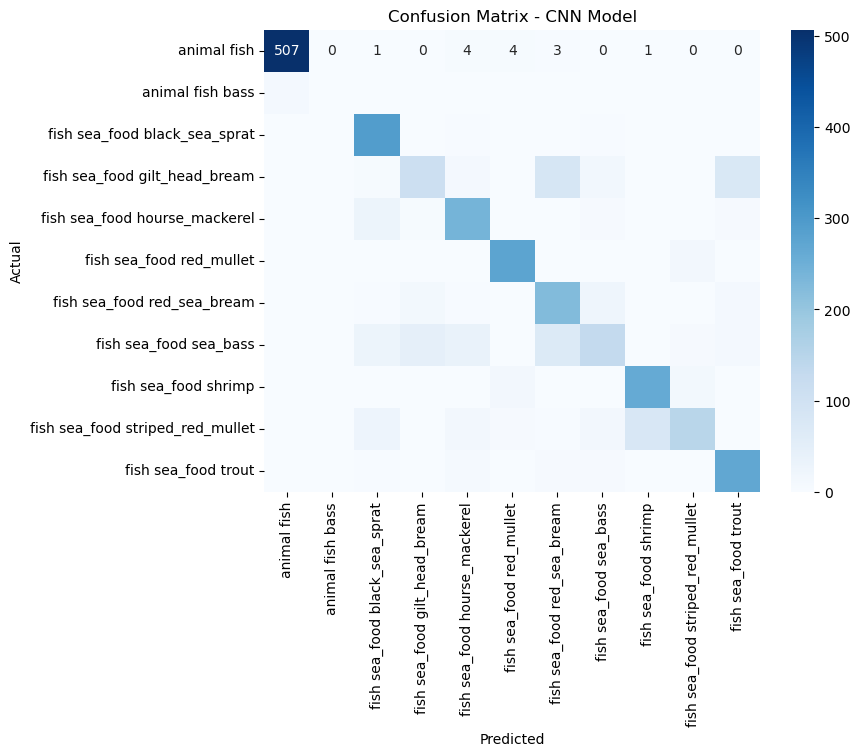

100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.3759 - loss: 1.7584
ResNet50 Model Test Accuracy: 0.2777
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step
Classification Report for ResNet50 Model:
                                  precision    recall  f1-score   support

                     animal fish       0.37      0.71      0.49       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.36      0.04      0.08       286
        fish sea_food red_mullet       0.27      0.45      0.33       291
     fish sea_food red_sea_bream       0.46      0.11      0.18       273
          fish sea_food sea_bass       0.67      0.01      0.01       327
            fish sea_food shrimp       0.28      0.43      0.34       289
fish sea_food striped_red_mullet       0.17      0.16      0.1

c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


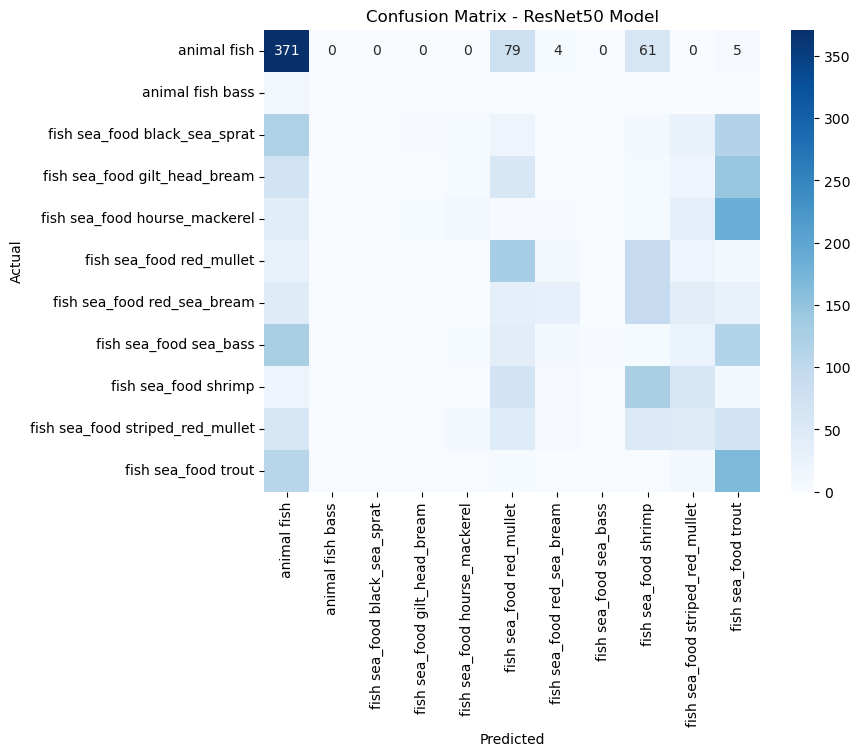

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - accuracy: 0.9974 - loss: 0.0116
MobileNet Model Test Accuracy: 0.9975
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 424ms/step
Classification Report for MobileNet Model:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.77      0.87        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      0.99      1.00       305
   fish sea_food hourse_mackerel       0.99      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.99   

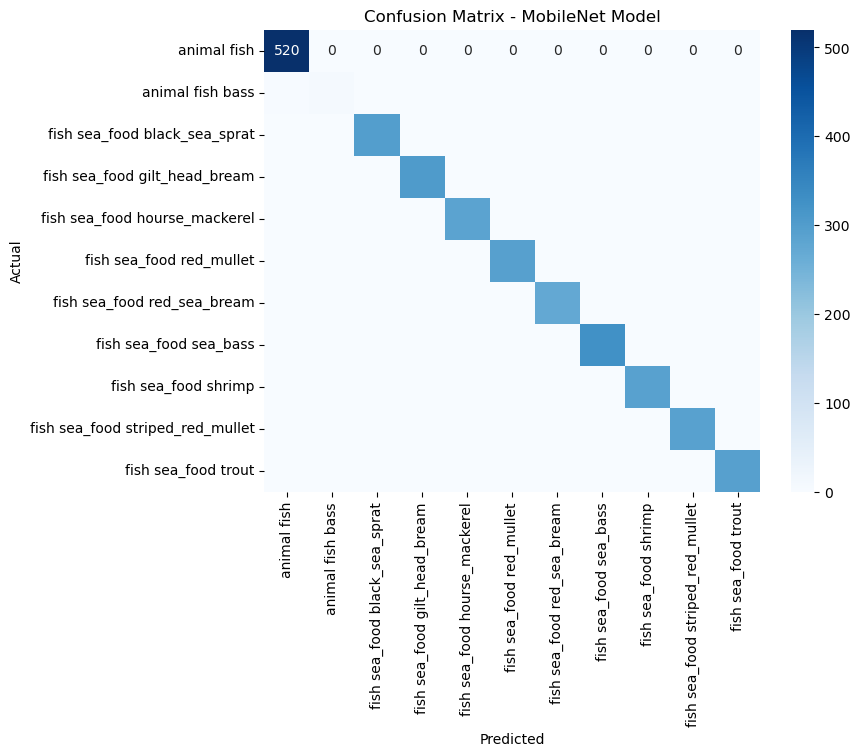

100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 943ms/step - accuracy: 0.9824 - loss: 0.0648
InceptionV3 Model Test Accuracy: 0.9812
100/100 ━━━━━━━━━━━━━━━━━━━━ 100s 979ms/step
Classification Report for InceptionV3 Model:
                                  precision    recall  f1-score   support

                     animal fish       0.97      1.00      0.98       520
                animal fish bass       1.00      0.15      0.27        13
   fish sea_food black_sea_sprat       0.99      0.98      0.98       298
   fish sea_food gilt_head_bream       0.97      0.99      0.98       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       1.00      0.97      0.98       291
     fish sea_food red_sea_bream       1.00      0.99      0.99       273
          fish sea_food sea_bass       0.97      0.97      0.97       327
            fish sea_food shrimp       1.00      0.99      0.99       289
fish sea_food striped_red_mullet       0.93      0.

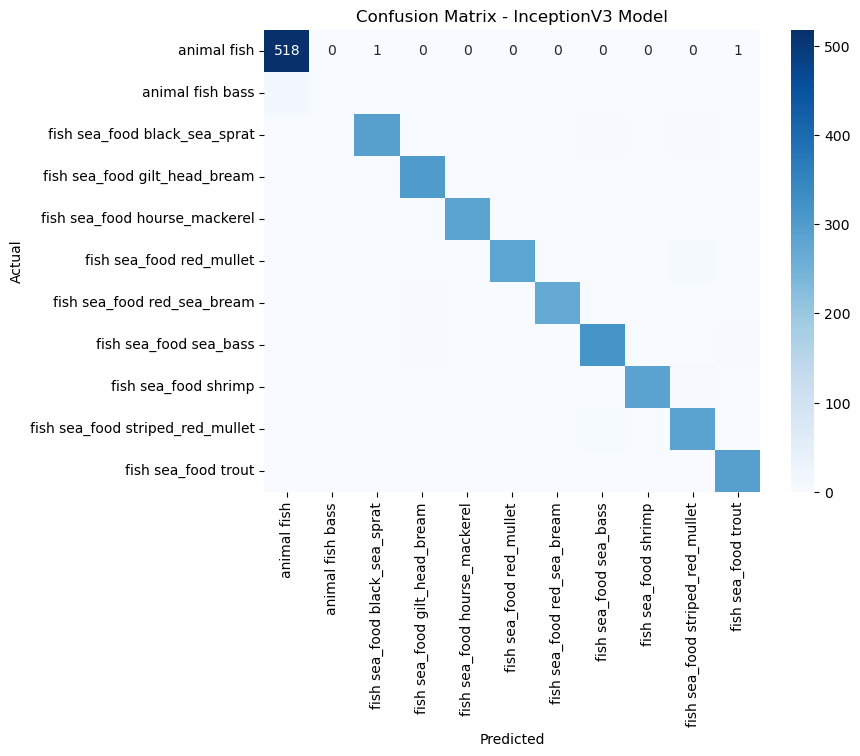

100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 725ms/step - accuracy: 0.4507 - loss: 2.1338
EfficientNetB0 Model Test Accuracy: 0.1632
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 750ms/step
Classification Report for EfficientNetB0 Model:
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00   

c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Raji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


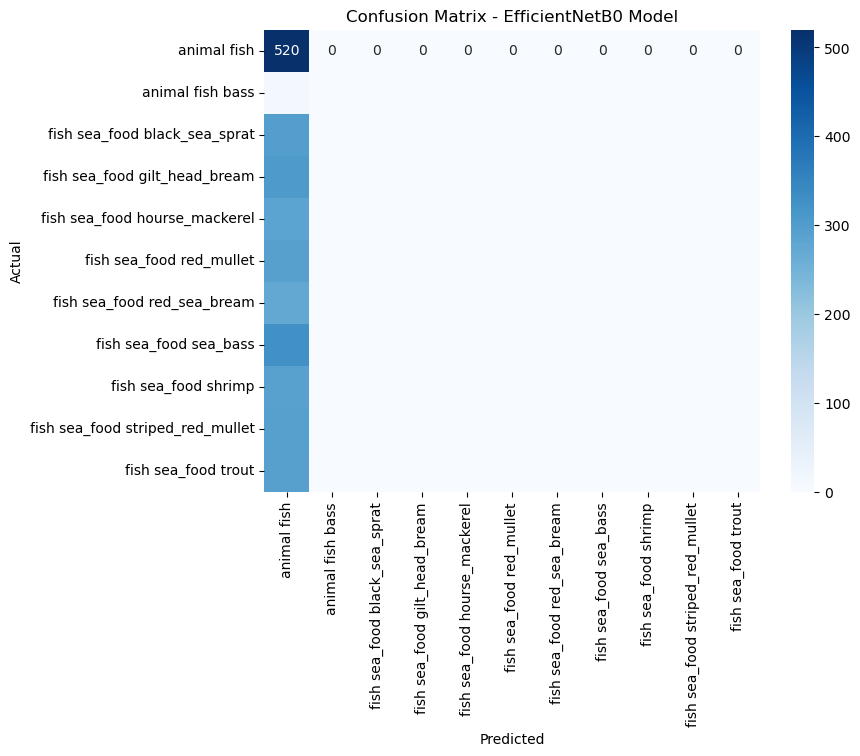

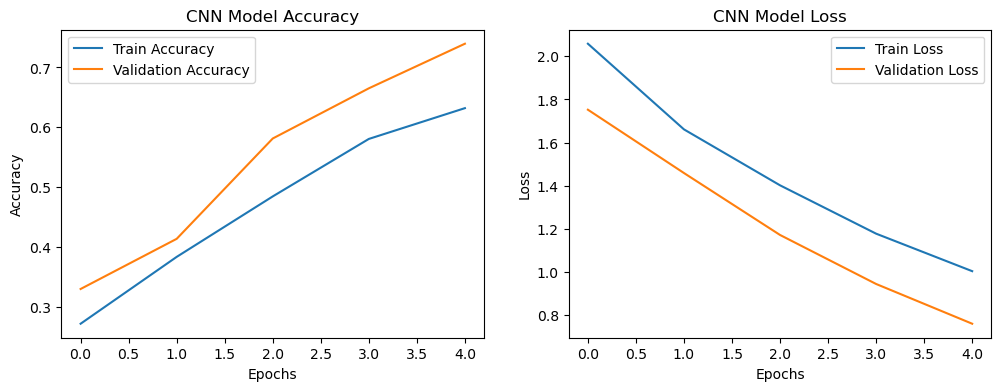

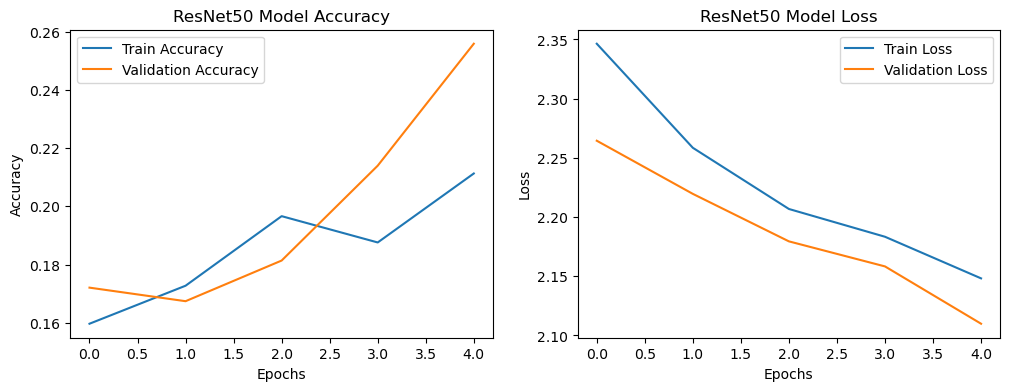

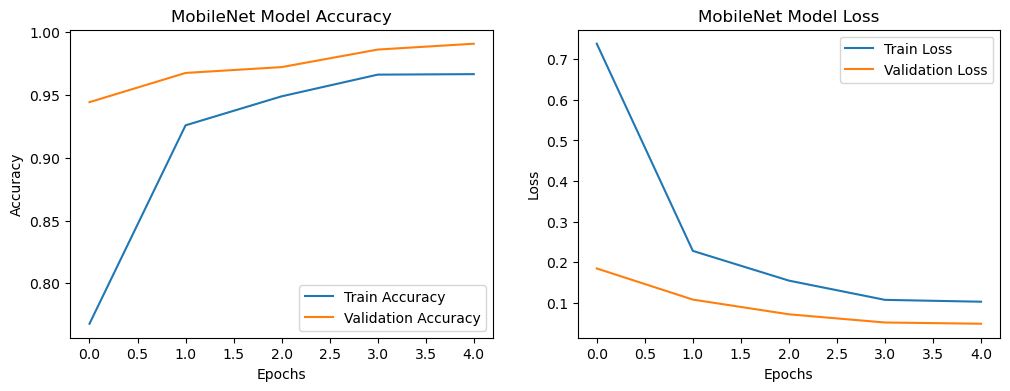

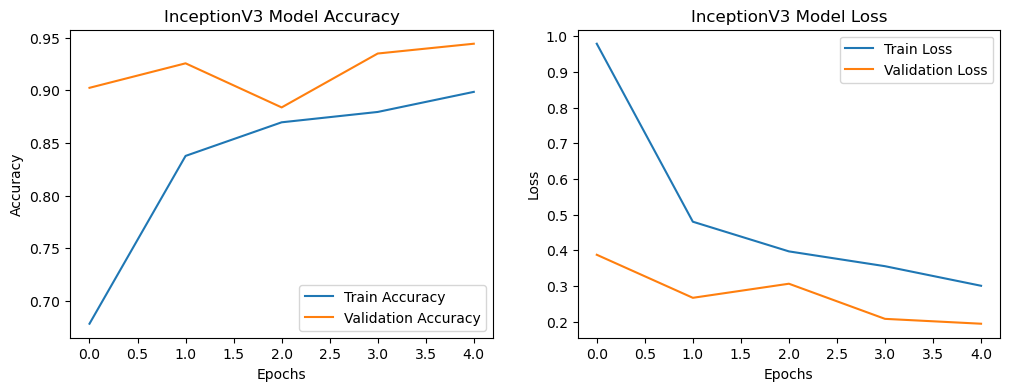

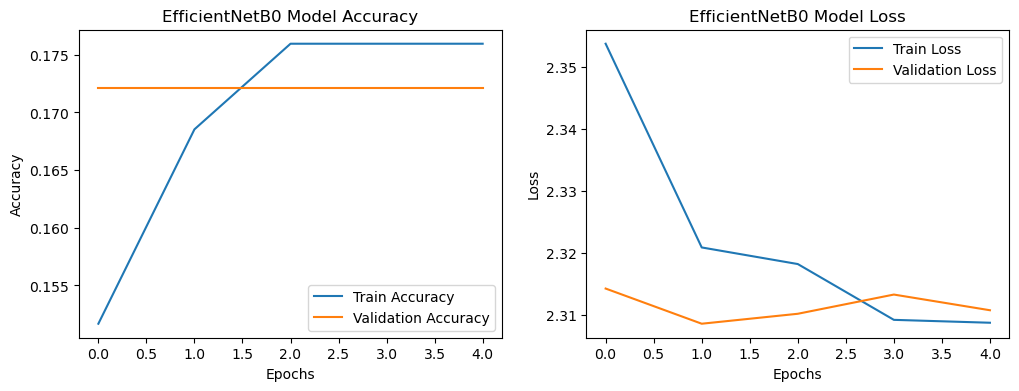

In [10]:
# Evaluate Models on Test Data
def evaluate_model(model, test_generator, model_name):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}")
    
    y_pred = np.argmax(model.predict(test_generator), axis=1)
    y_true = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

print("Evaluating Models on Test Data...")
evaluate_model(cnn_model, test_generator, "CNN Model")
evaluate_model(model_resnet, test_generator, "ResNet50 Model")
evaluate_model(model_mobilenet, test_generator, "MobileNet Model")
evaluate_model(model_inception, test_generator, "InceptionV3 Model")
evaluate_model(model_efficientnet, test_generator, "EfficientNetB0 Model")

# Plot Training History
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(cnn_history, "CNN Model")
plot_training_history(history_resnet, "ResNet50 Model")
plot_training_history(history_mobilenet, "MobileNet Model")
plot_training_history(history_inception, "InceptionV3 Model")
plot_training_history(history_efficientnet, "EfficientNetB0 Model")

In [11]:
# Evaluate models on test dataset
cnn_acc = cnn_model.evaluate(test_generator)[1]
resnet_acc = model_resnet.evaluate(test_generator)[1]
mobilenet_acc = model_mobilenet.evaluate(test_generator)[1]
inception_acc = model_inception.evaluate(test_generator)[1]
efficientnet_acc = model_efficientnet.evaluate(test_generator)[1]

# Find the best model
accuracies = {
    "CNN": cnn_acc,
    "ResNet50": resnet_acc,
    "MobileNet": mobilenet_acc,
    "InceptionV3": inception_acc,
    "EfficientNetB0": efficientnet_acc
}

best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f"Best Model: {best_model_name} with accuracy {best_model_accuracy}")


100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.8459 - loss: 0.4737
100/100 ━━━━━━━━━━━━━━━━━━━━ 280s 3s/step - accuracy: 0.3759 - loss: 1.7584
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.9974 - loss: 0.0116
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 773ms/step - accuracy: 0.9824 - loss: 0.0648
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 729ms/step - accuracy: 0.4507 - loss: 2.1338
Best Model: MobileNet with accuracy 0.9974898099899292


In [13]:
import json

# Dictionary mapping model names to their objects
models = {
    "CNN": cnn_model,
    "ResNet50": model_resnet,
    "MobileNet": model_mobilenet,
    "InceptionV3": model_inception,
    "EfficientNetB0": model_efficientnet
}

# Save best model details for Streamlit app
best_model_info = {
    "best_model_name": best_model_name,
    "best_model_accuracy": best_model_accuracy
}

with open("best_model_info.json", "w") as f:
    json.dump(best_model_info, f)

# Save the best model using the correct object
best_model = models[best_model_name]
best_model.save(f"{best_model_name}.h5")

print(f"Best model '{best_model_name}' saved with accuracy: {best_model_accuracy:.2f}")


Best model 'MobileNet' saved with accuracy: 1.00
